In [123]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
import math
import matplotlib.pyplot as plt

In [124]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
path = './data/data_regression.xlsx'
df = pd.read_excel(path)
df.shape

(3629, 19)

In [50]:
# 获取word2vec所需的语料格式
def get_corpus(df,feature_method):
    ans = []
    # 去除空值
    print('样本个数：{}'.format(df.shape[0]))
    df_dup = df.dropna(how='all',subset=['实施手术_'+feature_method,'术前诊断_'+feature_method]).copy()
    print('去除空值后的样本个数：{}'.format(df_dup.shape[0]))
    # 把含有空值的单元变为空字符
    df_dup.fillna(value='',inplace=True)

    for item in list(df_dup['实施手术_'+feature_method] +'|'+ df_dup['术前诊断_'+feature_method]):
        # print(item)
        arr = []
        for w in item.split('|'):
            if w != '':
                arr.append(w)
        ans.append(arr)
    print('语料长度：{}'.format(len(ans)))
    return ans

def isnullArr(arr):
    return len([item for item in arr if len(item) == 0])

In [53]:
corpus_CHI = get_corpus(df,'CHI')

样本个数：3629
去除空值后的样本个数：3629
语料长度：3629


In [52]:
corpus_IG = get_corpus(df,'IG')

样本个数：3629
去除空值后的样本个数：3629
语料长度：3629


In [51]:
corpus_MI = get_corpus(df,'MI')

样本个数：3629
去除空值后的样本个数：3245
语料长度：3245


In [88]:
corpus_CHI

[['二次', '剖宫产术', '妊娠', '周孕', '产', '晚孕', '瘢痕', '子宫', '右侧', '附件', '囊肿'],
 ['房颤', '消融', '改良', '迷宫术', '人工', '二尖瓣', '置换术', '风心病'],
 ['二尖瓣', '置换术', '心脏', '瓣膜', '置换术', '后', '瓣膜'],
 ['经皮椎间', '孔镜', '下腰', '骶', '椎间盘', '髓', '核', '切除术', '腰椎', '狭窄', '症'],
 ['腰', 'MIS-TLIF术', '腰椎间盘'],
 ['腹腔镜', '下全', '子宫', '双侧', '附件', '切除术', '盆腔', '淋巴结', '清扫术', '子宫', '内膜', '腺癌'],
 ['微创', '下经', '关节', '突椎间', '融合术', 'MIS-TLIF术', '腰椎', '狭窄', '伴', '腰椎间盘'],
 ['总管', '切开', '取石术', '空肠', '吻合术', '胆管炎', '胆总管', '十二指肠', '后', '胆囊', '后', '高血压'],
 ['结节', '囊肿', '切除术', '结节', '囊肿'],
 ['腹腔镜', '下', '胆囊', '切除术', '胆囊结石', '伴', '慢性', '胆囊炎'],
 ['左', '人工', '膝关节', '表面', '置换术', '双膝', '骨关节炎'],
 ['胸腔镜',
  '下',
  '右肺',
  '下',
  '叶',
  '切除术',
  '胸膜',
  '粘连',
  '烙断术',
  '膀胱',
  '穿刺',
  '造瘘术',
  '双肺',
  '磨',
  '玻璃',
  '结节'],
 ['腰', 'MIS-TLIF', '腰椎间盘', '症伴', '椎管', '狭窄', '高血压病'],
 ['椎间盘', '镜下', '后路', '腰椎', '核', '摘除术', '腰椎间盘', '症'],
 ['右侧', '输尿管', '软镜', '碎石术', '右侧', '输尿管', '支架', '重置术', '肾', '绞痛'],
 ['腹腔镜', '胰', '十二', '脂肠', '切除术', '十二指肠', '乳头', '肿瘤'],
 ['桥',

In [169]:
# 训练word2vec模型
# 返回训练损失值
def train_word2vec(corpus,epochs,step):
    # 一些超参数(大部分保持默认即可)
    WINDOW = 5 #窗口的最大距离
    
    loss = []
    loss_cum = []
    for epoch in epochs:
        model = Word2Vec(sentences=corpus,iter=epoch,min_count=0,compute_loss=True,alpha=0.0025,size=50)
#         loss_tmp = math.log2(model.get_latest_training_loss())
        loss_tmp = model.get_latest_training_loss()
        print('迭代次数：{}----Loss：{}'.format(epoch,loss_tmp))
        loss_cum.append(loss_tmp)
    for idx,val in enumerate(loss_cum):
        if idx == 0:
            loss.append(math.log2(val))
        else:
            loss.append(math.log2((val - loss_cum[idx - 1])/step))
    return loss

In [178]:
epochs = list(range(1,1002,50))
loss_CHI = train_word2vec(corpus_CHI,epochs,50)
loss_IG = train_word2vec(corpus_IG,epochs,50)
loss_MI = train_word2vec(corpus_MI,epochs,50)

迭代次数：1----Loss：61291.125
迭代次数：51----Loss：2303495.0
迭代次数：101----Loss：3289807.0
迭代次数：151----Loss：4036691.0
迭代次数：201----Loss：4678754.0
迭代次数：251----Loss：5232272.0
迭代次数：301----Loss：5729268.0
迭代次数：351----Loss：6215625.0
迭代次数：401----Loss：6654268.0
迭代次数：451----Loss：7079352.5
迭代次数：501----Loss：7489519.0
迭代次数：551----Loss：7865116.0
迭代次数：601----Loss：8242787.0
迭代次数：651----Loss：8565104.0
迭代次数：701----Loss：8875030.0
迭代次数：751----Loss：9157616.0
迭代次数：801----Loss：9443893.0
迭代次数：851----Loss：9706953.0
迭代次数：901----Loss：9978706.0
迭代次数：951----Loss：10264427.0
迭代次数：1001----Loss：10532676.0
迭代次数：1----Loss：63839.90234375
迭代次数：51----Loss：2390448.75
迭代次数：101----Loss：3428564.25
迭代次数：151----Loss：4223992.0
迭代次数：201----Loss：4872354.0
迭代次数：251----Loss：5447453.5
迭代次数：301----Loss：5970561.5
迭代次数：351----Loss：6467027.5
迭代次数：401----Loss：6959933.0
迭代次数：451----Loss：7344741.5
迭代次数：501----Loss：7791653.5
迭代次数：551----Loss：8173848.0
迭代次数：601----Loss：8524694.0
迭代次数：651----Loss：8852688.0
迭代次数：701----Loss：9149446.0
迭代次数：751----Loss：9446532

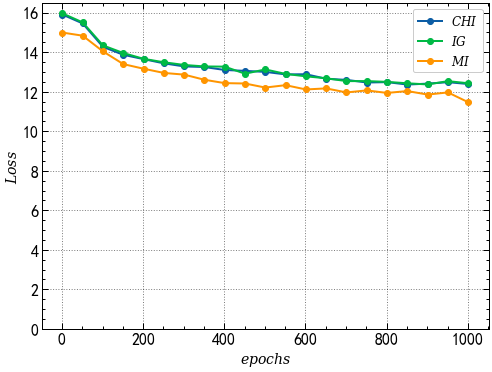

In [184]:
with plt.style.context(['science','grid','notebook']):
    plt.figure(figsize=(8,6))
    plt.ylim([0,16.5])
    plt.plot(epochs,loss_CHI,label=r'$CHI$',marker='o')
    plt.plot(epochs,loss_IG,label=r'$IG$',marker='o')
    plt.plot(epochs,loss_MI,label=r'$MI$',marker='o')
    plt.ylabel(r'$Loss$',fontdict={'size':14})
    plt.xlabel(r'$epochs$',fontdict={'size':14})
    plt.legend(loc='upper right',prop={'size':12})
    plt.show()

In [191]:
model_CHI = Word2Vec(sentences=corpus_CHI,min_count=0,alpha=0.0025,size=50,iter=400)

In [192]:
model_IG = Word2Vec(sentences=corpus_IG,min_count=0,alpha=0.0025,size=50,iter=400)

In [193]:
model_MI = Word2Vec(sentences=corpus_MI,min_count=0,alpha=0.0025,size=50,iter=400)

In [198]:
model_CHI.wv.similar_by_word('颅内',topn=10)

[('介入', 0.8962153792381287),
 ('栓塞术', 0.8947365283966064),
 ('动脉瘤', 0.8621755838394165),
 ('夹', 0.8378380537033081),
 ('闭术', 0.8286142349243164),
 ('造影', 0.8101133704185486),
 ('脑出血', 0.8067511320114136),
 ('造影术', 0.8039976358413696),
 ('栓塞', 0.8033795356750488),
 ('积气', 0.7917602062225342)]

In [199]:
model_IG.wv.similar_by_word('颅内',topn=10)

[('栓塞术', 0.8882977366447449),
 ('介入', 0.8680188059806824),
 ('动脉瘤', 0.8534830808639526),
 ('夹', 0.840761661529541),
 ('闭术', 0.8287294507026672),
 ('栓塞', 0.8177912831306458),
 ('积气', 0.810124397277832),
 ('造影术', 0.792586088180542),
 ('造影', 0.7858299016952515),
 ('脑出血', 0.7843195199966431)]

In [194]:
model_CHI.save('./word2vec_model/wv_model_CHI.model')

In [195]:
model_IG.save('./word2vec_model/wv_model_IG.model')
model_MI.save('./word2vec_model/wv_model_MI.model')

In [197]:
model_CHI.wv['颅内']

array([ 0.13878115, -0.68794125, -0.71422535,  1.1124455 ,  0.50272846,
       -2.5218284 , -1.4755182 ,  1.1665076 ,  2.615867  ,  0.4056662 ,
        1.1999605 , -0.19684362, -0.14483695,  0.03578263, -0.21634144,
        1.7303865 , -0.7243195 ,  1.1561713 , -0.53660995,  0.9448004 ,
        2.8212712 , -1.3190187 , -0.08339336, -0.31006485, -0.01088961,
       -2.6610837 ,  1.1728871 , -1.4514943 ,  0.03365532,  0.41634408,
        0.10388274, -1.3387622 ,  1.3241746 , -1.6755224 , -0.30022186,
       -1.0343069 ,  1.7696158 ,  0.3633496 , -0.63910866, -0.8257066 ,
       -1.313223  , -1.7207304 ,  1.7529804 , -1.088368  , -3.1837535 ,
        1.3840582 ,  1.0511822 ,  2.1749918 , -0.62009543, -1.6698185 ],
      dtype=float32)

In [200]:
model_IG.wv['颅内']

array([ 0.13780335, -0.6770551 , -0.41197103,  1.1357868 ,  0.7222415 ,
       -2.1581607 , -1.5506223 ,  0.8856149 ,  2.6489322 ,  0.6731515 ,
        1.1815784 , -0.17816995,  0.08396494,  0.17989746, -0.44624087,
        1.7868311 , -0.68386924,  0.8392281 , -0.16631947,  0.847078  ,
        2.7325754 , -1.6544544 ,  0.08879361, -0.30637842,  0.13268255,
       -2.862399  ,  1.5349795 , -1.5240395 , -0.25758934,  0.35629606,
       -0.21892098, -1.3776785 ,  1.1847477 , -1.6964625 , -0.16603208,
       -0.8343209 ,  1.9303542 ,  0.23948407, -0.2590162 , -1.1507108 ,
       -1.3593745 , -1.5725652 ,  1.7660415 , -1.1153537 , -3.0429268 ,
        1.6371286 ,  0.97726816,  2.7537544 , -0.7052364 , -1.5551583 ],
      dtype=float32)